<h1 style="color:orange">EXERCISE CLASS 7 - SPC for non-iid data </h1>



SCC = Special Value Control Chart

FVC = Fitted Values Control Chart

# Exercise 1 - 1D Trend Data - Trend CC - SCC & FCV

Data stored in the file `ESE7_ex1.csv` contains the measurements of time (in seconds) required to complete a surgical operation.
1. Design a control chart for the mean based on moving range estimate.
2. Provide an interpretation for out of control data (if any).
3. Suggest an adequate process data model.
4. Design a control chart for a ‘trend’ model.
5. Design a SCC and a FVC control charts for the process data.

> Let's start by importing the required libraries and loading the data.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE7_ex1.csv')

# Inspect the dataset
data.head()

,time
0,600
1,480
2,540
3,240
4,420


## Point 1

Design a control chart for the mean based on moving range estimate.

> ### Solution 1
>
> Control chart for individual.
>
> What if we design the control chart without any graphical analysis of the process?
>
> Computation of moving ranges $MR$:
> 1. Compute the differences between consecutive observations (lag = 1): $D_i = X_{i+1} - X_i$.
> 2. Compute the absolute values of the differences: $MR = |D_i|$.

In [2]:
# Compute the moving ranges using the diff function
data['MR'] = data['time'].diff().abs()

# Print out descriptive statistics of MR and time
data.describe()

,time,MR
count,26.000000,25.000000
mean,325.769231,123.600000
std,155.413592,114.378028
min,120.000000,0.000000
25%,210.000000,30.000000
50%,300.000000,120.000000
75%,450.000000,180.000000
max,690.000000,450.000000


> Now let's make the control chart for the mean of the moving ranges.
>
> Remember the formulas for the control limits.
>
> **I chart**:
> - $UCL = \bar{x} + 3 \left(\frac{\bar{MR}}{d_2} \right)$
> - $CL = \bar{x}$
> - $LCL = \bar{x} - 3 \left(\frac{\bar{MR}}{d_2} \right)$
>
> **MR chart**:
> - $UCL = D_4 \bar{MR}$
> - $CL = \bar{MR}$
> - $LCL = 0$

In [3]:
# Define the constants for the control limits
d2 = qda.constants.getd2(2)
D4 = qda.constants.getD4(2)

# make a copy of the data
df = data.copy()
# change the name of the column time to I
df.rename(columns={'time':'I'}, inplace=True)

# Print the first 5 rows of the new dataframe
df.head()

,I,MR
0,600,NaN
1,480,120.0
2,540,60.0
3,240,300.0
4,420,180.0


In [4]:
# Create columns for the upper and lower control limits
df['I_UCL'] = df['I'].mean() + (3*df['MR'].mean()/d2)
df['I_CL'] = df['I'].mean()
df['I_LCL'] = df['I'].mean() - (3*df['MR'].mean()/d2)
df['MR_UCL'] = D4 * df['MR'].mean()
df['MR_CL'] = df['MR'].mean()
df['MR_LCL'] = 0

# Print the first 5 rows of the new dataframe
df.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL
0,600,NaN,654.382175,325.769231,-2.843713,403.743345,123.6,0
1,480,120.0,654.382175,325.769231,-2.843713,403.743345,123.6,0
2,540,60.0,654.382175,325.769231,-2.843713,403.743345,123.6,0
3,240,300.0,654.382175,325.769231,-2.843713,403.743345,123.6,0
4,420,180.0,654.382175,325.769231,-2.843713,403.743345,123.6,0


In [5]:

# Define columns for the alarm rule
df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) | 
                (df['I'] < df['I_LCL']), df['I'], np.nan)
df['MR_TEST1'] = np.where((df['MR'] > df['MR_UCL']) | 
                (df['MR'] < df['MR_LCL']), df['MR'], np.nan)

# Print the first 5 rows of the new dataframe
df.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL,I_TEST1,MR_TEST1
0,600,NaN,654.382175,325.769231,-2.843713,403.743345,123.6,0,NaN,NaN
1,480,120.0,654.382175,325.769231,-2.843713,403.743345,123.6,0,NaN,NaN
2,540,60.0,654.382175,325.769231,-2.843713,403.743345,123.6,0,NaN,NaN
3,240,300.0,654.382175,325.769231,-2.843713,403.743345,123.6,0,NaN,NaN
4,420,180.0,654.382175,325.769231,-2.843713,403.743345,123.6,0,NaN,NaN


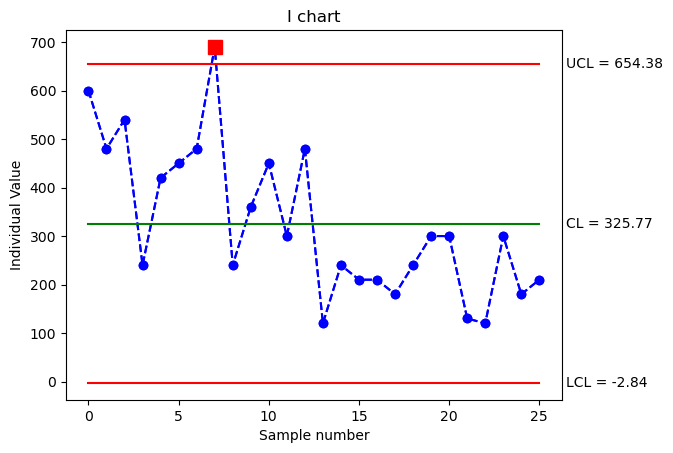

In [6]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['I_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_CL'].iloc[0], 'CL = {:.2f}'.format(df['I_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

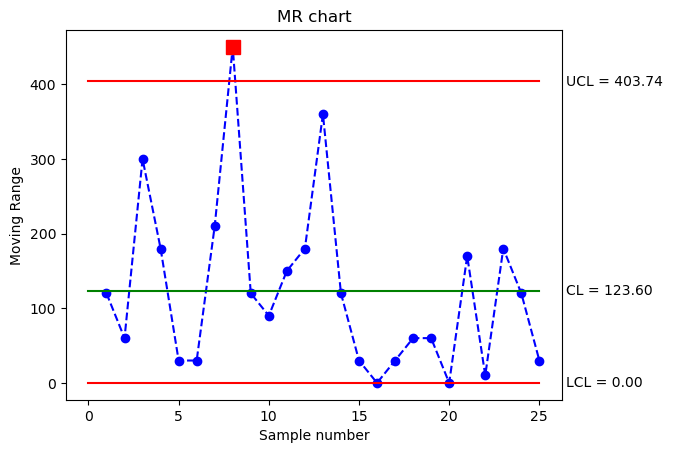

In [7]:
plt.title('MR chart')
plt.plot(df['MR'], color='b', linestyle='--', marker='o')
plt.plot(df['MR_UCL'], color='r')
plt.plot(df['MR_CL'], color='g')
plt.plot(df['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['MR_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['MR_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_CL'].iloc[0], 'CL = {:.2f}'.format(df['MR_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['MR_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

## Point 2

Provide an interpretation for out of control data (if any).

> ### Solution
> The measured variable (time) is NON NEGATIVE. Thus, 𝐿𝐶𝐿 = −3 makes no sense. We can set LCL=0, but remind that it can never be violated.
>
> What can we conclude about the process?
> Nothing, because we made no check of control chart assumptions!
>
> Let's check if:
> - The data are random.
> - The data are normally distributed.

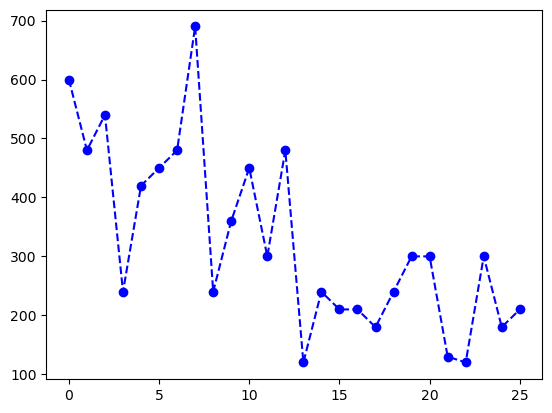

In [8]:
# Plot the data first
plt.plot(data['time'], color='b', linestyle='--', marker='o')

> Plot the autocorrelation and partial autocorrelation functions of the data. Use the `plot_acf` and `plot_pacf` functions from the `statsmodels` package.

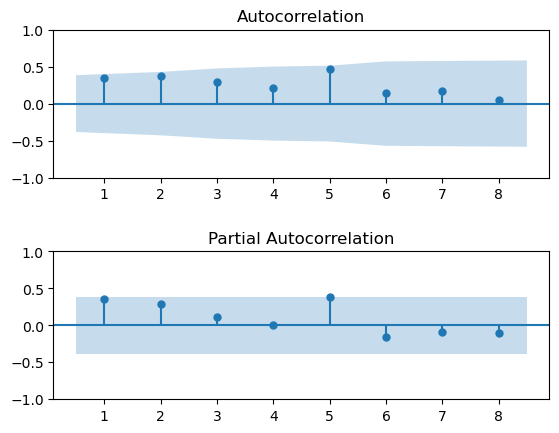

In [9]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['time'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['time'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> Perform the runs test to check if the data are random. Use the `runstest_1samp` function from the `statsmodels` package.

In [10]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data['time'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))


Runs test p-value = 0.024


> The runs test gives a low p-value, this means that the data are not random. But remember that we have a small sample size. Let's check if the data are normally distributed.

> Test the normality of the data. 

Shapiro-Wilk test p-value = 0.081


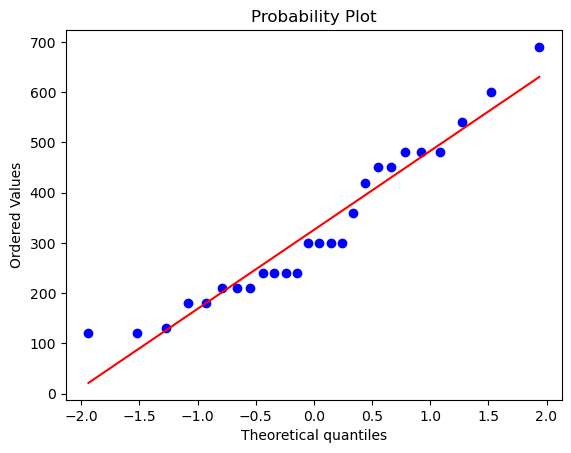

In [11]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data['time'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data['time'], dist="norm", plot=plt)
plt.show()

> Data are barely normal and the process may be not random decreasing trend seems to be present. 
> 
> It is worth to try fitting a trend model. 

## Point 3

Suggest an adequate process data model.

In [12]:
# Add a column with the sample number to use as regressor
data['t'] = np.arange(1, len(data)+1)

data.head()


,time,MR,t
0,600,NaN,1
1,480,120.0,2
2,540,60.0,3
3,240,300.0,4
4,420,180.0,5


In [13]:
# Fit a regression model to the data
import statsmodels.api as sm

# Fit the linear regression model
x = data['t']
x = sm.add_constant(x)
y = data['time']
model = sm.OLS(y,x).fit()

# Print the model summary
qda.summary(model)

REGRESSION EQUATION
-------------------
time =  + 518.554 const -14.280 t

COEFFICIENTS
------------
 Term     Coef  SE Coef  T-Value    P-Value
const 518.5538  45.5680  11.3798 3.7191e-11
    t -14.2803   2.9506  -4.8397 6.2424e-05

MODEL SUMMARY
-------------
       S   R-sq  R-sq(adj)
112.8402 0.4939     0.4728

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS     Adj MS  F-Value    P-Value
Regression  1.0 2.9824e+05 2.9824e+05  23.4232 6.2424e-05
     const  1.0 1.6489e+06 1.6489e+06 129.4994 3.7191e-11
         t  1.0 2.9824e+05 2.9824e+05  23.4232 6.2424e-05
     Error 24.0 3.0559e+05 1.2733e+04      NaN        NaN
     Total 25.0 6.0383e+05        NaN      NaN        NaN


> Now that we have a trend model, we can check if the assumptions on the residuals are met (randomness and normality).

Shapiro-Wilk test p-value on the residuals = 0.700


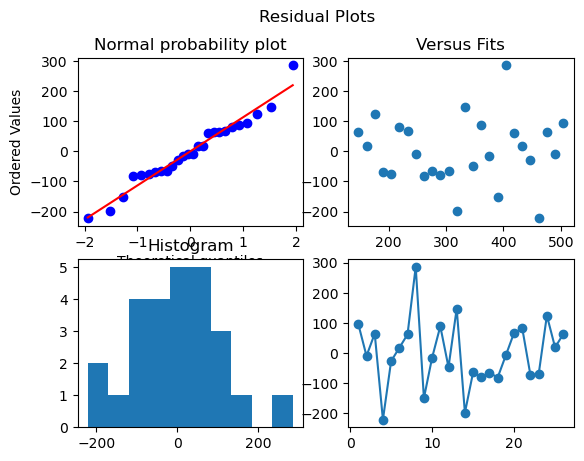

In [14]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)


Runs test p-value on the residuals = 0.710


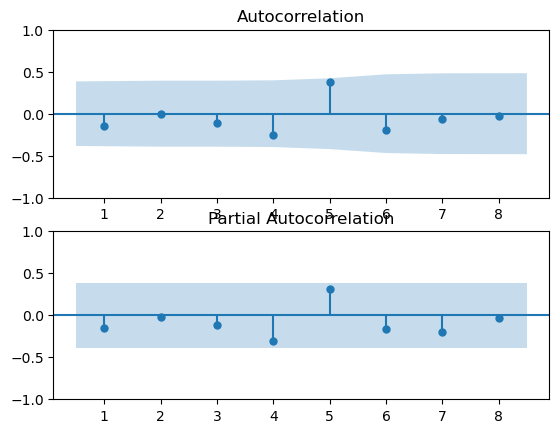

In [15]:
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()


## Point 4

Design a control chart for a ‘trend’ model.

> ### Solution
> A TREND control chart will be based on the residuals of the trend model.
>
> $$UCL = \beta_0 + \beta_1 \cdot t + 3 \frac{\bar{MR}}{d_2 (2)}$$
> $$CL = \beta_0 + \beta_1 \cdot t$$
> $$LCL = \beta_0 + \beta_1 \cdot t - 3 \frac{\bar{MR}}{d_2 (2)}$$
>
> Which MR should I use? To be rigorous, we should use the MR of the residuals. Alwan states that the difference between the MR of the residuals and the MR of the original data is negligible, but let's use the MR of the residuals.

In [16]:
df_res = pd.DataFrame({'I': model.resid})
df_res['MR'] = df_res['I'].diff().abs()

df_res.describe()

,I,MR
count,2.6000e+01,25.0000
mean,4.1539e-14,126.7985
std,1.1056e+02,109.5280
min,-2.2143e+02,4.2803
25%,-6.9026e+01,44.2803
50%,-8.6103e+00,105.7197
75%,6.6362e+01,194.2803
max,2.8569e+02,435.7197


> Let's create a TREND control chart. We can use the model fits and the MR of the residuals to compute the control limits. 

In [17]:
# Let's reuse the old dataframe df
# Replace the I_CL column with the fitted values
df['I_CL'] = model.fittedvalues

# Replace the I_UCL and I_LCL columns with the upper and 
# lower control limits computed from the formula
df['I_UCL'] = df['I_CL'] + 3 * df_res['MR'].mean() / d2
df['I_LCL'] = df['I_CL'] - 3 * df_res['MR'].mean() / d2

# Also update the TEST1 column
df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) | (df['I'] < df['I_LCL']), df['I'], np.nan)


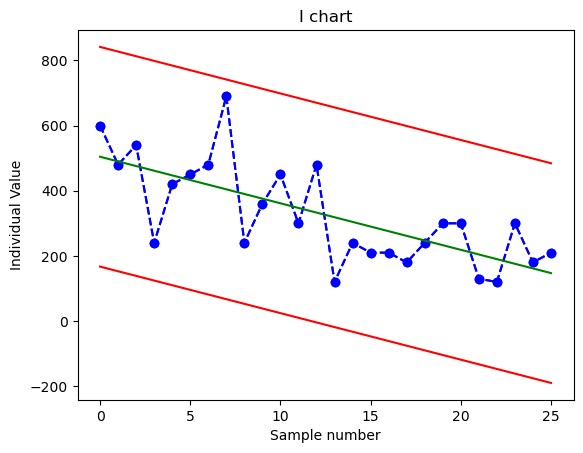

In [18]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)

plt.show()

> Now there are no out of control points. But the LCL has values below 0. This makes no sense, because the time cannot be negative. We can set LCL=0, but remind that it can never be violated.

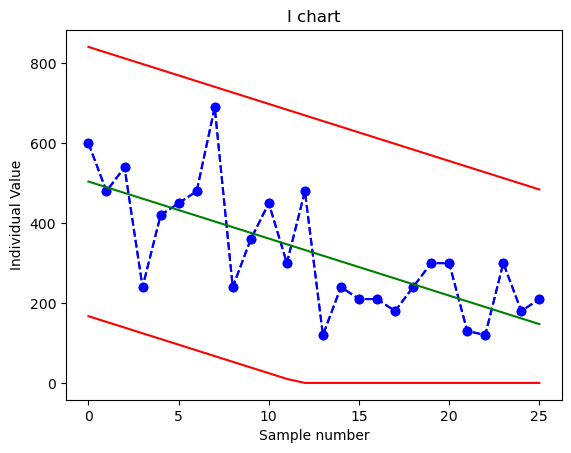

In [19]:
df['I_LCL'] = np.where((df['I_LCL'] < 0), 0, df['I_LCL'])
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)

plt.show()

## Point 5

Design a SCC and a FVC control charts for the process data.

> ### Solution
>
> Let's build the same I-MR chart this time using the model residuals.

In [20]:
# Create columns for the upper and lower control limits
df_res['I_UCL'] = df_res['I'].mean() + (3*df_res['MR'].mean()/d2)
df_res['I_CL'] = df_res['I'].mean()
df_res['I_LCL'] = df_res['I'].mean() - (3*df_res['MR'].mean()/d2)
df_res['MR_UCL'] = D4 * df_res['MR'].mean()
df_res['MR_CL'] = df_res['MR'].mean()
df_res['MR_LCL'] = 0

# Define columns for the Western Electric alarm rules
df_res['I_TEST1'] = np.where((df_res['I'] > df_res['I_UCL']) | 
            (df_res['I'] < df_res['I_LCL']), df_res['I'], np.nan)
df_res['MR_TEST1'] = np.where((df_res['MR'] > df_res['MR_UCL']) | 
            (df_res['MR'] < df_res['MR_LCL']), df_res['MR'], np.nan)

# Print the first 5 rows of the new dataframe
df_res.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL,I_TEST1,MR_TEST1
0,95.7265,NaN,337.1167,4.1539e-14,-337.1167,414.1913,126.7985,0,NaN,NaN
1,-9.9932,105.7197,337.1167,4.1539e-14,-337.1167,414.1913,126.7985,0,NaN,NaN
2,64.2872,74.2803,337.1167,4.1539e-14,-337.1167,414.1913,126.7985,0,NaN,NaN
3,-221.4325,285.7197,337.1167,4.1539e-14,-337.1167,414.1913,126.7985,0,NaN,NaN
4,-27.1521,194.2803,337.1167,4.1539e-14,-337.1167,414.1913,126.7985,0,NaN,NaN


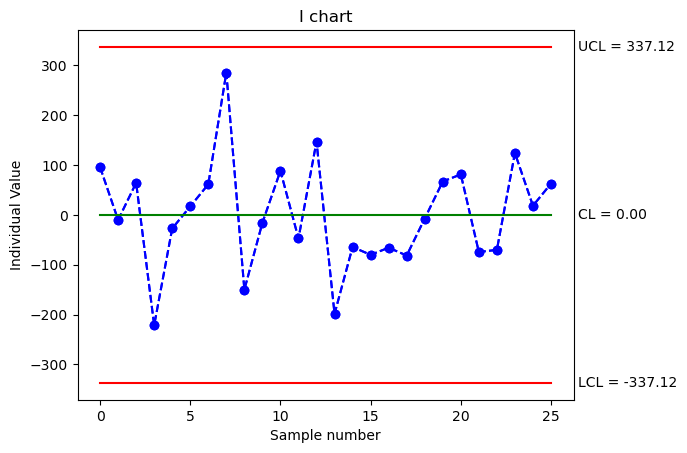

In [21]:
# Plot the I chart
plt.title('I chart')
plt.plot(df_res['I'], color='b', linestyle='--', marker='o')
plt.plot(df_res['I'], color='b', linestyle='--', marker='o')
plt.plot(df_res['I_UCL'], color='r')
plt.plot(df_res['I_CL'], color='g')
plt.plot(df_res['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
# print the first value of the column I_UCL
plt.text(len(df_res)+.5, df_res['I_UCL'].iloc[0], 
        'UCL = {:.2f}'.format(df_res['I_UCL'].iloc[0]), 
        verticalalignment='center')
plt.text(len(df_res)+.5, df_res['I_CL'].iloc[0], 
        'CL = {:.2f}'.format(df_res['I_CL'].iloc[0]), 
        verticalalignment='center')
plt.text(len(df_res)+.5, df_res['I_LCL'].iloc[0], 
        'LCL = {:.2f}'.format(df_res['I_LCL'].iloc[0]), 
        verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df_res['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)

plt.show()

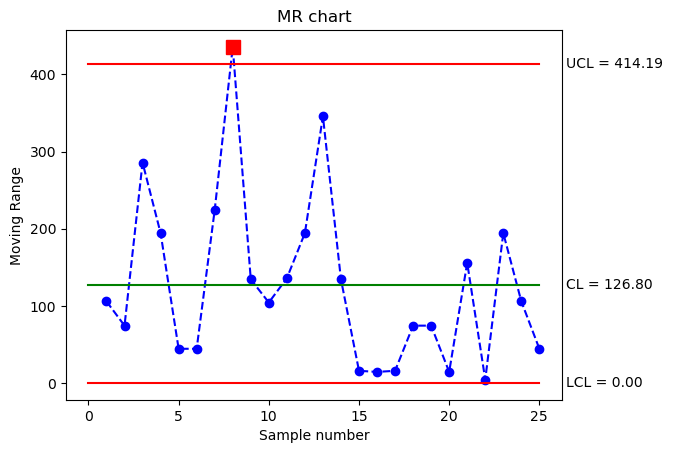

In [22]:
plt.title('MR chart')
plt.plot(df_res['MR'], color='b', linestyle='--', marker='o')
plt.plot(df_res['MR_UCL'], color='r')
plt.plot(df_res['MR_CL'], color='g')
plt.plot(df_res['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df_res)+.5, df_res['MR_UCL'].iloc[0], \
         'UCL = {:.2f}'.format(df_res['MR_UCL'].iloc[0]), 
         verticalalignment='center')
plt.text(len(df_res)+.5, df_res['MR_CL'].iloc[0], 
        'CL = {:.2f}'.format(df_res['MR_CL'].iloc[0]), 
        verticalalignment='center')
plt.text(len(df_res)+.5, df_res['MR_LCL'].iloc[0], 
        'LCL = {:.2f}'.format(df_res['MR_LCL'].iloc[0]), 
        verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df_res['MR_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)

plt.show()

> Now assume we found an assignable cause for the OOC observation 8. 
>
> We need to redesign the control charts by inserting a DUMMY VARIABLE such that:
> - $dummy = 0$ for $t \neq 8$
> - $dummy = 1$ for $t = 8$

In [23]:
# Create the dummy variable X
data['dummy'] = np.where((data['t'] == 8), 1, 0)

data.head()

,time,MR,t,dummy
0,600,NaN,1,0
1,480,120.0,2,0
2,540,60.0,3,0
3,240,300.0,4,0
4,420,180.0,5,0


In [24]:
# Fit a model
x = data[['t', 'dummy']]
x = sm.add_constant(x)
y = data['time']
model2 = sm.OLS(y,x).fit()
qda.summary(model2)

REGRESSION EQUATION
-------------------
time =  + 491.459 const -13.138 t + 303.648 dummy

COEFFICIENTS
------------
 Term     Coef  SE Coef  T-Value    P-Value
const 491.4591  40.4001  12.1648 1.6827e-11
    t -13.1384   2.5785  -5.0953 3.6839e-05
dummy 303.6483 100.5632   3.0195 6.1044e-03

MODEL SUMMARY
-------------
      S   R-sq  R-sq(adj)
97.5439 0.6376     0.6061

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS     Adj MS  F-Value    P-Value
Regression  2.0 3.8499e+05 1.9250e+05  20.2313 8.5294e-06
     const  1.0 1.4080e+06 1.4080e+06 147.9824 1.6827e-11
         t  1.0 2.4702e+05 2.4702e+05  25.9620 3.6839e-05
     dummy  1.0 8.6749e+04 8.6749e+04   9.1172 6.1044e-03
     Error 23.0 2.1884e+05 9.5148e+03      NaN        NaN
     Total 25.0 6.0383e+05        NaN      NaN        NaN


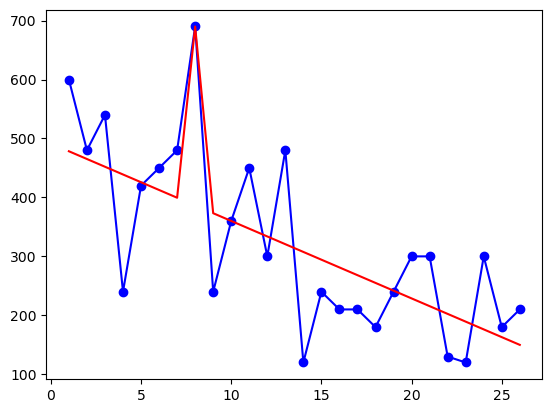

In [25]:
plt.plot(data['t'], data['time'], color='b', linestyle='-', marker='o')
plt.plot(data['t'], model2.fittedvalues, color='r')
plt.show()

> Now that we have a trend model, we can check if the assumptions on the residuals are met (randomness and normality).

Shapiro-Wilk test p-value on the residuals = 0.530


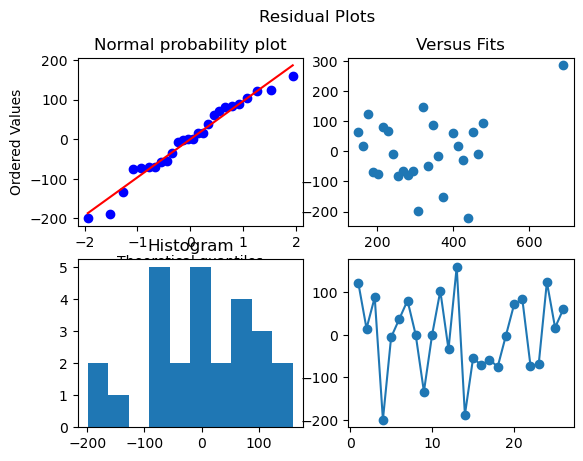

In [26]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model2.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model2.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model2.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model2.resid)+1), model2.resid, 'o-')

_, pval_SW_res = stats.shapiro(model2.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)


Runs test p-value on the residuals = 0.230


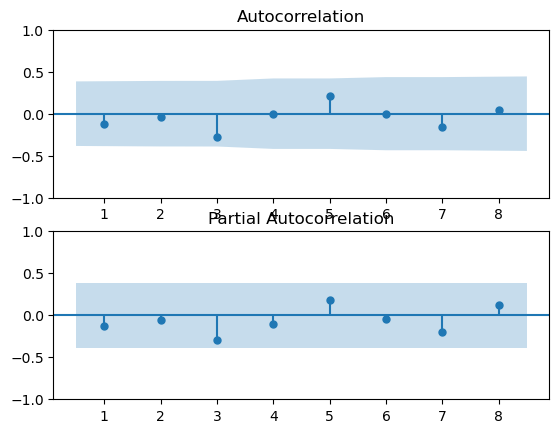

In [27]:
_, pval_runs_res = runstest_1samp(model2.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model2.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
sgt.plot_pacf(model2.resid, lags = int(len(data)/3), zero=False, ax=ax[1],
            method = 'ywm')
plt.show()

> Build a new SCC control chart on the residuals of the new trend model.

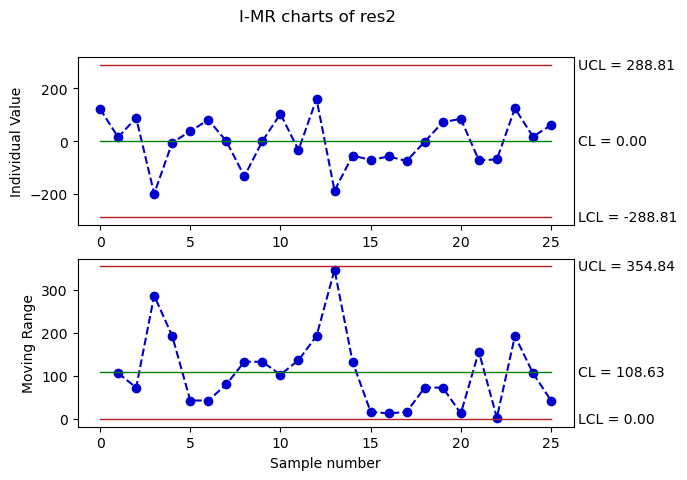

In [28]:
# Make a new dataframe for the new residuals
df_res2 = pd.DataFrame({'res2': model2.resid})

# Create the IMR chart
df_res2 = qda.ControlCharts.IMR(df_res2, 'res2')

# Exercise 2 - Fit AR(1) model, SCC&FCV

The data reported in `ESE7_ex2.csv` refer to temperature measurements in a chemical process, one measure per minute (Time Series Analysis: Forecasting and Control Box, Jenkins e Reinsel 1994). 

1. Design a traditional control chart for the process data. 
2. Identify a suitable model for the process data.
3. By using the identified model, design both SCC and FVC charts; compare the results with those achieved at point 1.

> Let's start by importing the required libraries and loading the data.

In [29]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE7_ex2.csv')

# Inspect the dataset
data.head()

,temp
0,200
1,202
2,208
3,204
4,204


## Point 1 - WRONG DESIGN! 

Design a traditional control chart for the process data.

> ### Solution
> Let’s design a control chart in a BLIND way, i.e., without checking the assumptions and without any graphical analysis of process data (**wrong approach**).

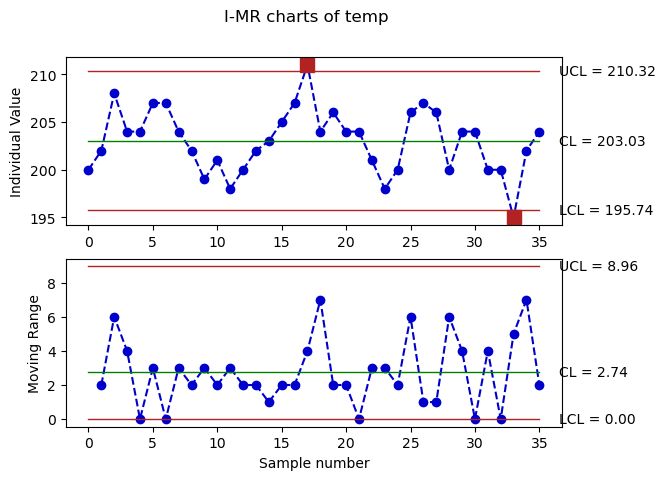

In [30]:
df_IMR = qda.ControlCharts.IMR(data, 'temp')

> Two observations are out of control. 

> Is this result trustworthy?
> **NO**, unless assumptions are verified.

> Perform the runs test to check if the data are random. Use the `runstest_1samp` function from the `statsmodels` package.

In [31]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data['temp'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.002


> Plot the autocorrelation and partial autocorrelation functions of the data. Use the `plot_acf` and `plot_pacf` functions from the `statsmodels` package.

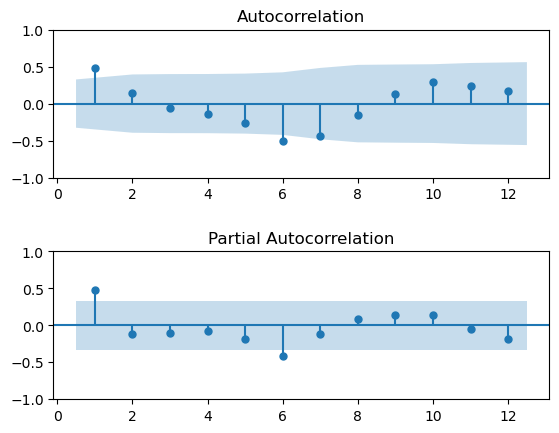

In [32]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['temp'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['temp'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> Data are nonrandom and the autocorrelation function shows a significant autocorrelation at lag 1. 

## Point 2 - Correct Data Modelling

Identify a suitable model for the process data.

> ### Solution
> Let’s try to fit a AR(1) model to the data. 

In [33]:
# Add a column with the lagged temperature to use as regressor
data['temp_lag1'] = data['temp'].shift(1)

# Fit the linear regression model
import statsmodels.api as sm

x = data['temp_lag1'][1:]
x = sm.add_constant(x) # this command is used to consider a constant to the model, is equivalent to create and add a column of ones
y = data['temp'][1:]
model = sm.OLS(y, x).fit()
qda.summary(model)

REGRESSION EQUATION
-------------------
temp =  + 105.800 const + 0.479 temp_lag1

COEFFICIENTS
------------
     Term     Coef  SE Coef  T-Value  P-Value
    const 105.7999  30.5748   3.4604   0.0015
temp_lag1   0.4794   0.1506   3.1833   0.0032

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
2.9664 0.2349     0.2117

ANALYSIS OF VARIANCE
---------------------
    Source   DF   Adj SS   Adj MS  F-Value  P-Value
Regression  1.0  89.1649  89.1649  10.1332   0.0032
     const  1.0 105.3642 105.3642  11.9741   0.0015
 temp_lag1  1.0  89.1649  89.1649  10.1332   0.0032
     Error 33.0 290.3779   8.7993      NaN      NaN
     Total 34.0 379.5429      NaN      NaN      NaN


> Now check the residuals of the AR(1) model. 

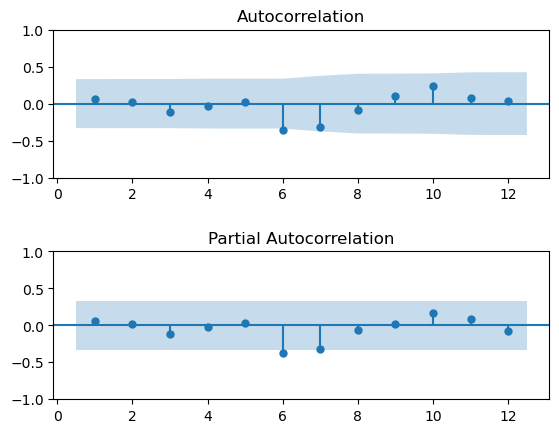

In [34]:
# Check the autocorrelation of the residuals
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [35]:
_, pval_runs_resid = runstest_1samp(model.resid, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs_resid))

Runs test p-value = 0.244


Shapiro-Wilk test p-value on the residuals = 0.954


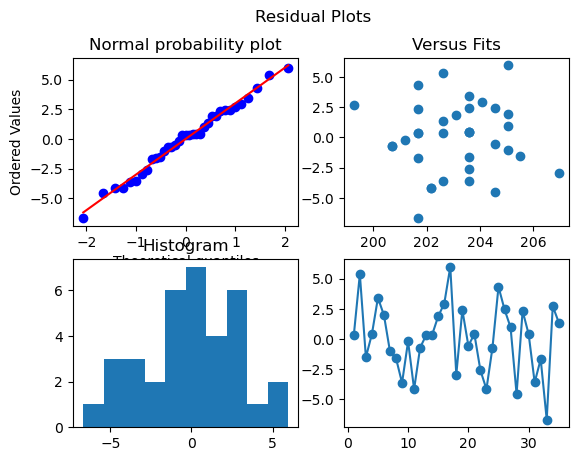

In [36]:
# Plot the residuals and test for normality
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

> All assumptions are verified.

## Point 3 - SCC&FCV

By using the identified model, design both SCC and FVC charts; compare the results with those achieved at point 1.

> ### Solution
> Let’s design a SCC chart for the AR(1) model.

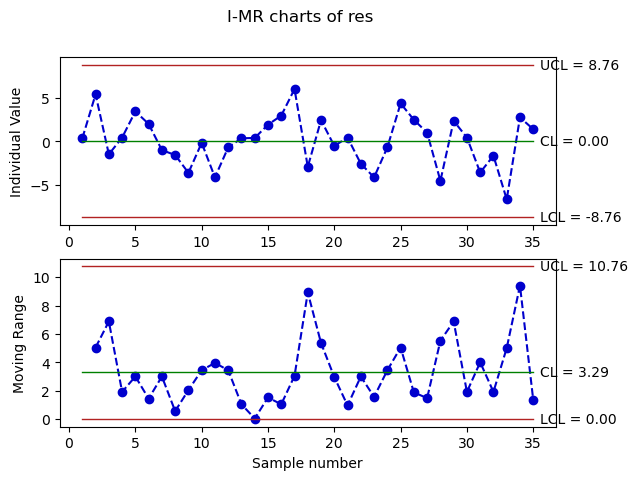

In [37]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(model.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

> Notice that the MR of residuals is significantly different from the MR of original observations. Thus, the approximation that is usable for TREND models is not applicable to AR(1) models. 

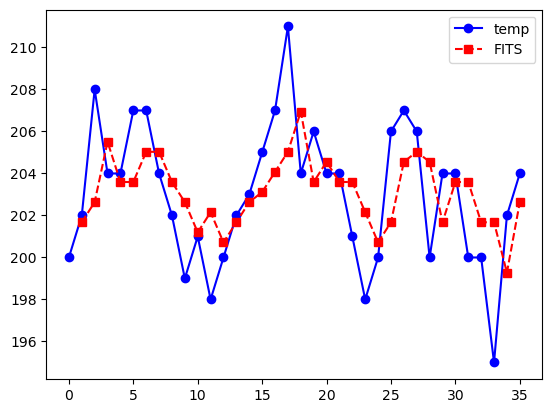

In [38]:
plt.plot(data['temp'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(model.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

## Point 4 - Model-based Control Chart
Also in this case (in analogy with the TREND control chart) we can design a model-based CC as follows.

In [39]:
d2 = qda.constants.getd2(2)

MRbar_res = df_SCC_IMR['MR_CL'].iloc[0]

In [40]:
# Create a new dataframe with the original data and the center line (the fitted values)
df = pd.DataFrame({'I': data['temp'].iloc[1:], 'I_CL': model.fittedvalues}, index=data.index[1:])

# Add the I_UCL and I_LCL columns with the upper and 
# lower control limits computed from the formula
df['I_UCL'] = df['I_CL'] + 3 * MRbar_res / d2
df['I_LCL'] = df['I_CL'] - 3 * MRbar_res / d2

# Add the TEST1 column
df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) | (df['I'] < df['I_LCL']), df['I'], np.nan)


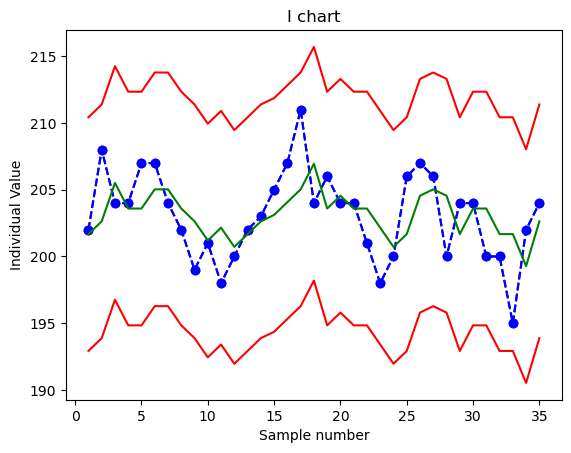

In [41]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)

plt.show()

> We may conclude that no out-of-control data are present, but the trend pattern between observation 12 and 18 might be investigated more in depth.

# Exercise 3 - AR(1), SCC&FCV, non-normal I-MR w/ probabilitics limits

A paper published by *Quality Engineering* reported a dataset that consists of loading weigths (in grams) of insecticide tanks. Data are reported in the file `ESE7_ex3.csv`. 
1. Determine the data auto-correlation (measures within each sample are reported in acquisition order).
2. Fit a suitable regression model that captures the temporal correlation of observations. 
3. Design both SCC and FVC charts for process data
4. If data within the sample are not random, the Xbar chart based on all the data is different from the Xbar chart designed by using the means as individual observations. Explain why (for sake of simplicity, discuss the case with n=2).



In [42]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE7_ex3.csv')

# Inspect the dataset
data.head()

,x1,x2,x3,x4
0,456,458,439,448
1,459,462,495,500
2,443,453,457,458
3,470,450,478,470
4,457,456,460,457


## Point 1 - EDA, PACF, ACF

Determine the data auto-correlation (measures within each sample are reported in acquisition order).

> ### Solution
> Let's stack the data row-wise and compute the autocorrelation function (ACF) of the resulting vector.

In [43]:
# Transpose the dataset and stack the columns
data_stack = data.transpose().melt()

# Remove unnecessary columns
data_stack = data_stack.drop('variable', axis=1)

data_stack.head()



,value
0,456
1,458
2,439
3,448
4,459


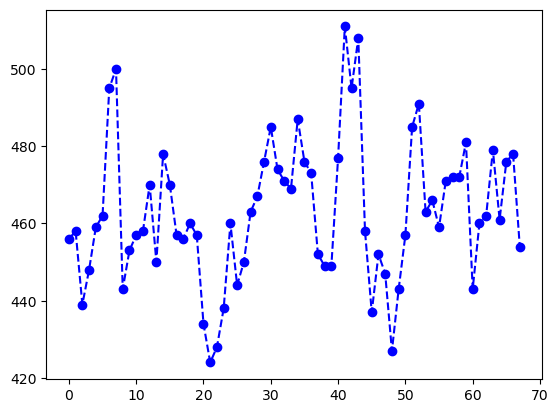

In [44]:
# Plot the data first
plt.plot(data_stack['value'], color='b', linestyle='--', marker='o')
plt.show()

> Perform the runs test to check if the data are random. Use the `runstest_1samp` function from the `statsmodels` package.

In [45]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data_stack['value'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))


Runs test p-value = 0.000


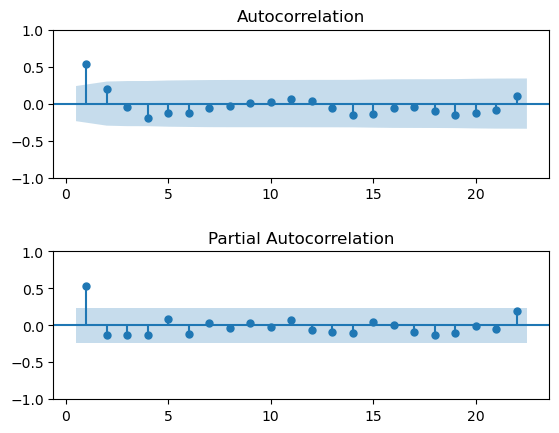

In [46]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data_stack['value'], lags = int(len(data_stack)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data_stack['value'], lags = int(len(data_stack)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

## Point 2 - Fit auto-regression model

Fit a suitable regression model that captures the temporal correlation of observations.

> Let's try to fit an AR(1) model. 

In [47]:
# Add a column with the lagged temperature to use as regressor
data_stack['lag1'] = data_stack['value'].shift(1)

# Fit the linear regression model
import statsmodels.api as sm

x = data_stack['lag1'][1:]
x = sm.add_constant(x) # this command is used to consider a constant to the model, is equivalent to create and add a column of ones
y = data_stack['value'][1:]
model = sm.OLS(y, x).fit()
qda.summary(model)

REGRESSION EQUATION
-------------------
value =  + 213.531 const + 0.539 lag1

COEFFICIENTS
------------
 Term     Coef  SE Coef  T-Value    P-Value
const 213.5313  48.4731   4.4052 4.0377e-05
 lag1   0.5388   0.1046   5.1515 2.6037e-06

MODEL SUMMARY
-------------
    S   R-sq  R-sq(adj)
15.77 0.2899      0.279

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS    Adj MS  F-Value    P-Value
Regression  1.0  6599.8759 6599.8759  26.5383 2.6037e-06
     const  1.0  4825.9632 4825.9632  19.4054 4.0377e-05
      lag1  1.0  6599.8759 6599.8759  26.5383 2.6037e-06
     Error 65.0 16164.9898  248.6922      NaN        NaN
     Total 66.0 22764.8657       NaN      NaN        NaN


> Check the residuals

Shapiro-Wilk test p-value on the residuals = 0.790


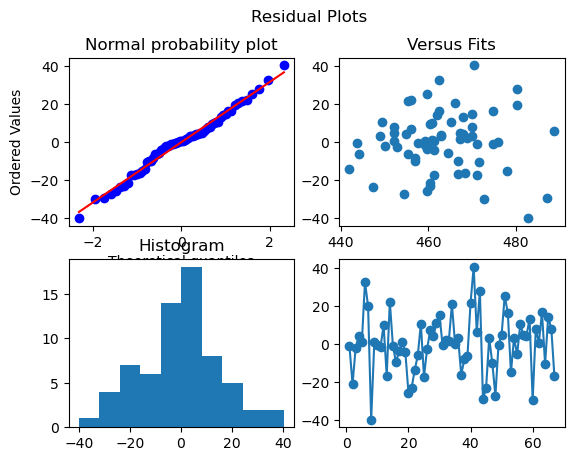

In [48]:
# Plot the residuals and test for normality
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

In [49]:
_, pval_runs_resid = runstest_1samp(model.resid, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs_resid))

Runs test p-value = 0.412


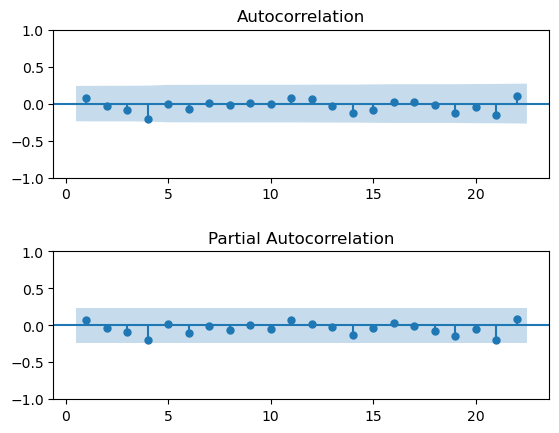

In [50]:
# Check the autocorrelation of the residuals
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data_stack)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(data_stack)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

## Point 3 - IMR w/ non normal MR stat

Design both SCC and FVC charts for process data.

> Let's make a SCC. 

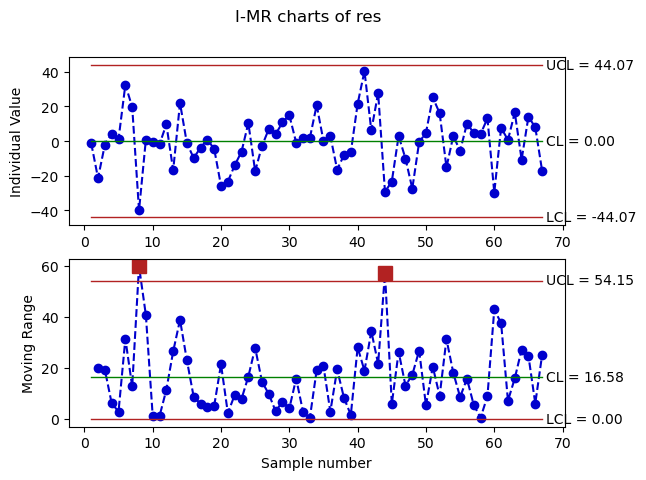

In [51]:
df_SCC = pd.DataFrame({'res': model.resid})
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res')

> Are the OOCs due to non-normality of the MR statistic?
>
> Try to design the MR chart with probabilistic limits, i.e., transform the MR statistic. 

Shapiro-Wilk test p-value = 0.000


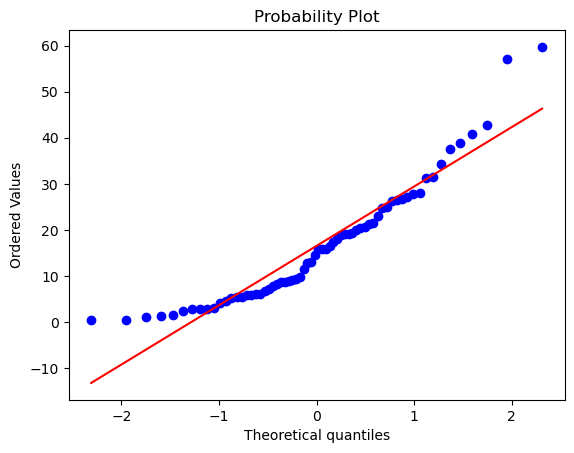

In [52]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(df_SCC['MR'].iloc[1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(df_SCC['MR'].iloc[1:], dist="norm", plot=plt)
plt.show()

Lambda = 0.355


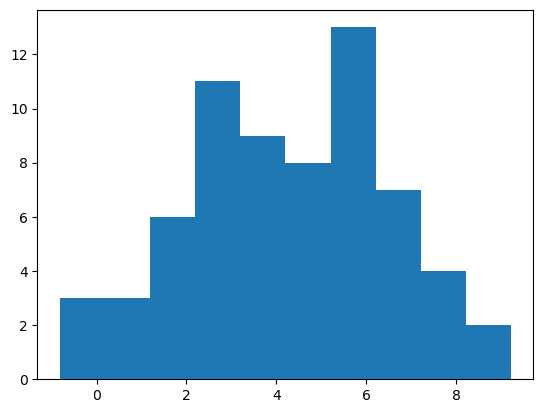

In [53]:
# Box-Cox transformation and return the transformed data
[data_BC, lmbda] = stats.boxcox(df_SCC['MR'].iloc[1:])

print('Lambda = %.3f' % lmbda)

# Plot a histogram of the transformed data
plt.hist(data_BC)
plt.show()

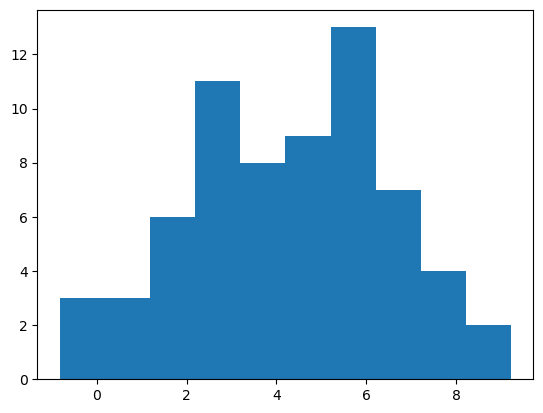

In [54]:
# Use lambda = 0 for Box-Cox transformation and return the transformed data
df_SCC['MR_boxcox'] = stats.boxcox(df_SCC['MR'], lmbda=0.355)

# Plot a histogram of the transformed data
plt.hist(df_SCC['MR_boxcox'])
plt.show()

Shapiro-Wilk test p-value = 0.697


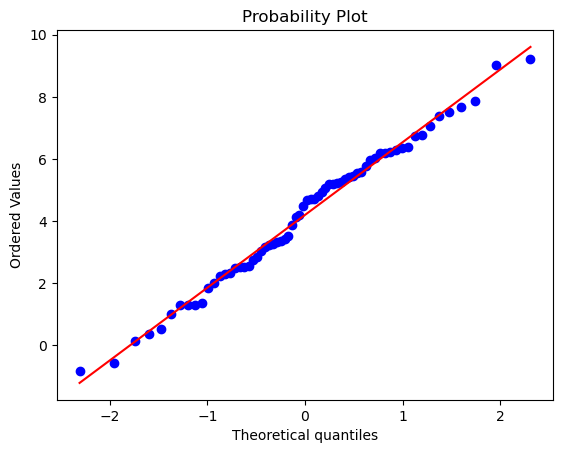

In [56]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(df_SCC['MR_boxcox'].iloc[1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(df_SCC['MR_boxcox'].iloc[1:], dist="norm", plot=plt)
plt.show()

> After the transformation we can design an I chart on the transformed data. Select the I_CL, I_UCL, I_LCL to build the new chart for MR.

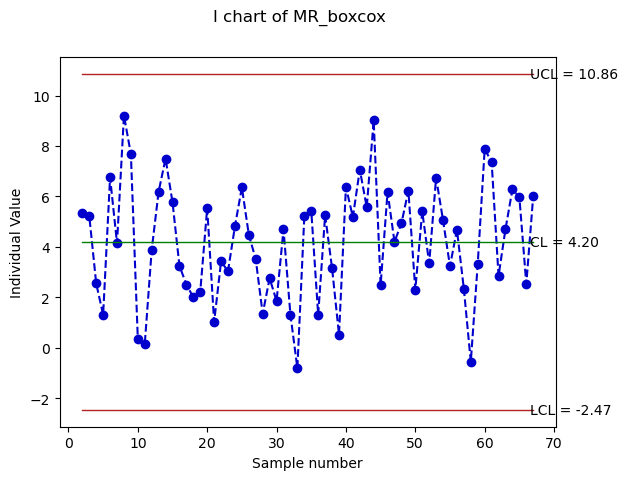

In [57]:
df_MR_boxcox = df_SCC[['MR_boxcox']].iloc[1:]
df_MR_boxcox = qda.ControlCharts.IMR(df_MR_boxcox, 'MR_boxcox', plotit=False) # plotit=false to prevent plotting and only get the values

# Plot the I chart
fig, ax = plt.subplots(1, 1)
fig.suptitle(('I chart of MR_boxcox'))
ax.plot(df_MR_boxcox['MR_boxcox'], color='mediumblue', linestyle='--', marker='o')
ax.plot(df_MR_boxcox['I_UCL'], color='firebrick', linewidth=1)
ax.plot(df_MR_boxcox['I_CL'], color='g', linewidth=1)
ax.plot(df_MR_boxcox['I_LCL'], color='firebrick', linewidth=1)
ax.set_ylabel('Individual Value')
ax.set_xlabel('Sample number')
# add the values of the control limits on the right side of the plot
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df_MR_boxcox['I_UCL'].iloc[0]), verticalalignment='center')
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_CL'].iloc[0], 'CL = {:.2f}'.format(df_MR_boxcox['I_CL'].iloc[0]), verticalalignment='center')
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df_MR_boxcox['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
ax.plot(df_MR_boxcox['I_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.show()


> Let's plot the fitted value chart (FVC)

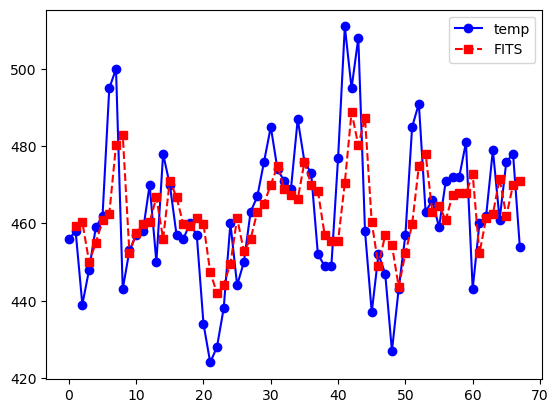

In [58]:
plt.plot(data_stack['value'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(model.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

## Point 4

If data within the sample are not random, the Xbar chart based on all the data is different from the Xbar chart designed by using the means as individual observations. Explain why (for sake of simplicity, discuss the case with n=2).

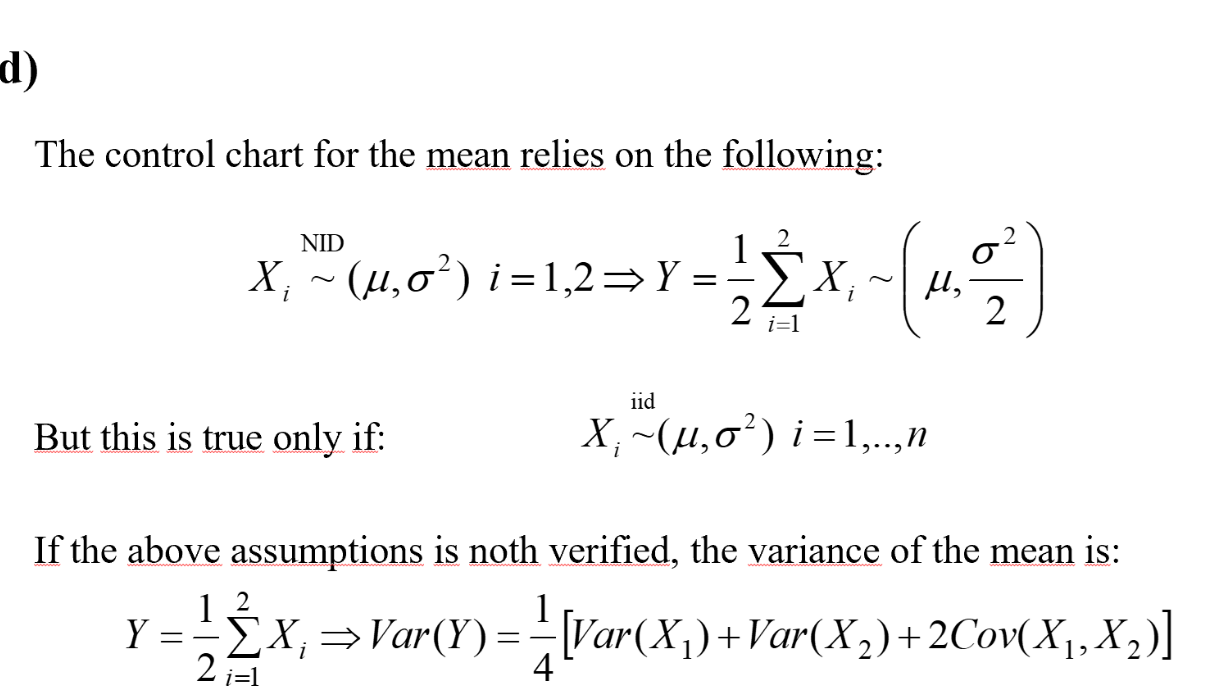

# Exercise 4 - I-MR-R Control Chart

A paper published by *Quality Engineering* reported a dataset that consists of loading weigths (in grams) of insecticide tanks. Data are reported in the file `ESE7_ex3.csv`. 
1. Design a control chart for the mean. Which conclusions can we draw about the process?
2. Consider the sample means as invidual measurements: design a control chart for the mean. 
3. Compare the results at point 1 and 2. What can we conclude?


In [59]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE7_ex3.csv')

# Inspect the dataset
data.head()

,x1,x2,x3,x4
0,456,458,439,448
1,459,462,495,500
2,443,453,457,458
3,470,450,478,470
4,457,456,460,457


## Point 1 - Xbar-R CC not working

Design a control chart for the mean. Which conclusions can we draw about the process?

> ### Solution
>
> Inspect the data by plotting the individual datapoints. 

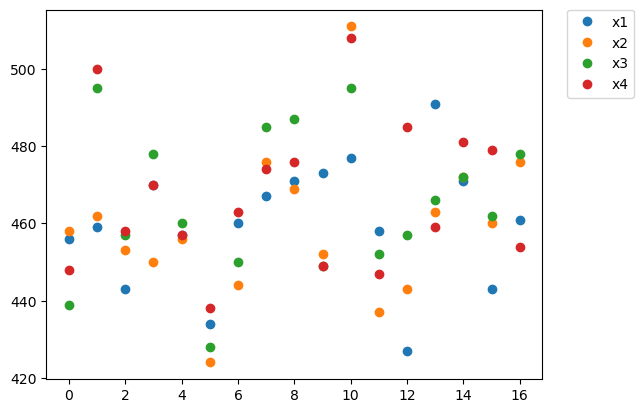

In [60]:
# Make a scatter plot of all the columns against the index
plt.plot(data['x1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['x2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['x3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['x4'], linestyle='none', marker='o', label = 'x4')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

> Check if the data are normal.

Shapiro-Wilk test p-value = 0.593


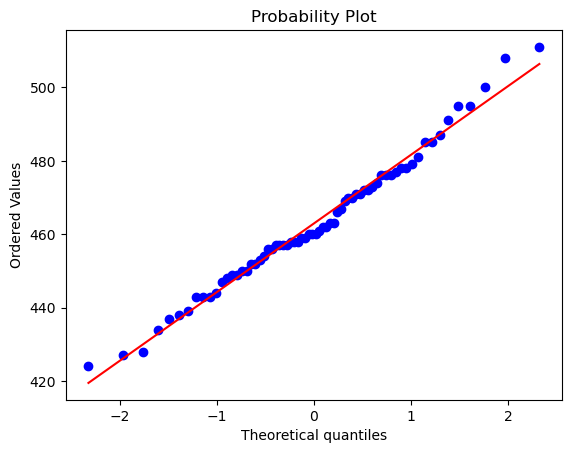

In [61]:
# Stack the columns on top of each other
data_stack = data.stack()

# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data_stack)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data_stack, dist="norm", plot=plt)
plt.show()

> Let's design the Xbar-R chart.

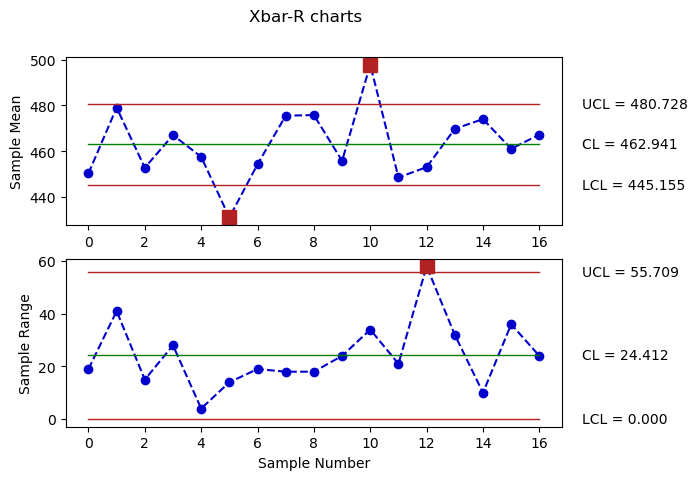

In [62]:
data_XR = qda.ControlCharts.XbarR(data)

The control limits of the Xbar chart look to narrow with respect to the natural variabilty of the statistic. This can be caused by a violation of assumptions (independence) within the sample. Thus, the Xbar-R control chart may be not approrpiate to monitor these data. 

## Point 2 - I-MR-R/S Chart

Consider the sample means as invidual measurements: design a control chart for the mean.

> ### Solution
> Design a "Between groups" control chart, i.e., a chart that assumes all the samples to be individual measurements.

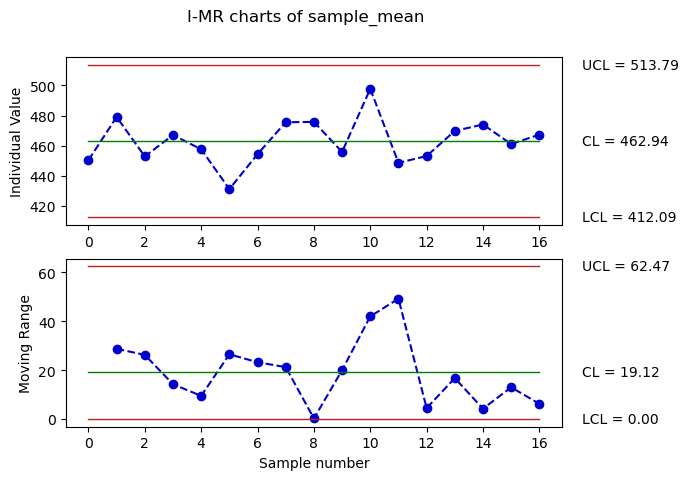

In [63]:
# Create a new dataframe that stores the mean of all the samples
data_Xbar = pd.DataFrame(data_XR['sample_mean'])

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')


With the I chart we can get rid of the violation of the independece assumption within the sample. The MR chart allows monitoring the between sample variability, while the R chart designed before can still be used to monitor the within sample variability. 
A control charting scheme quite effective in this case is the so-called I-MR-R control chart (or I-MR-S, if the S chart is used in place of the R chart), where: 1) the I chart allows monitoring the mean of the process treating sample means as individual observations; 2) the MR chart allows monitoring the between sample variability; 3) the MR chart allows monitoring the within sample variability.

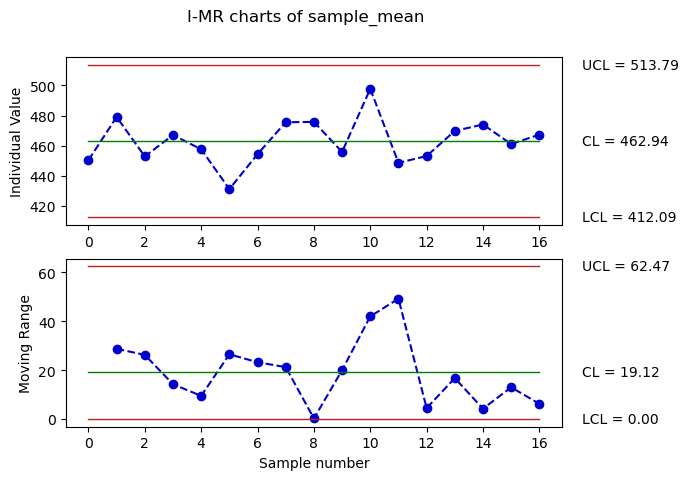

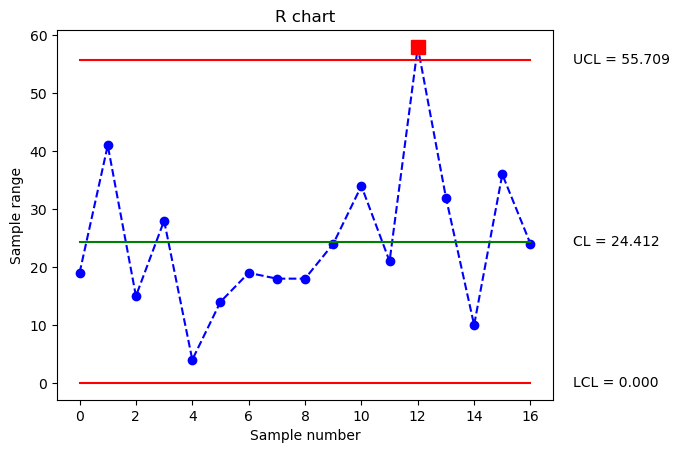

In [64]:
# Design a I-MR-R control chart (so we have 2 plots in the section)

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')

# Plot the R chart as well
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()


There is an alarm in the 13th sample. A search for assignable causes shall be performed. In the absence of information about possible assignable causes, the alarm can be labelled as a false alarm, and the design phase of the control chart is over.